In [1]:
from src.dataloader import MyDataset
from src.config import data_config, aff_aug, image_noises

In [2]:
train_ds = MyDataset(data_config, aff_aug.augment_image, image_noises.augment_image)
train_dl = train_ds(batch_size=32, shuffle=False)


In [3]:
im, text, text_len = next(iter(train_dl))

In [4]:
text_len

tensor([16, 20,  6, 14, 10, 17, 17, 10,  6, 10,  5, 20, 20, 20, 20, 20, 20, 20,
         5, 15, 20, 20, 20, 16,  5, 20, 17, 20,  6, 14, 17, 19])

دی سِریِ یِم فضا


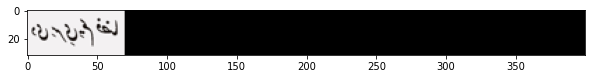

یخس وِزِ پوچَھر یِمن


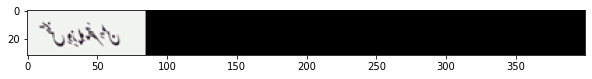

عبدالل


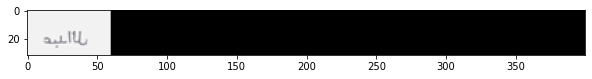

فِدا نامٕ جانٕ


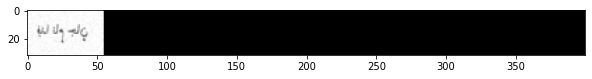

تلٕ ؤوِتھ


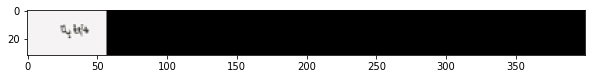

کان و سانن تَرتیب


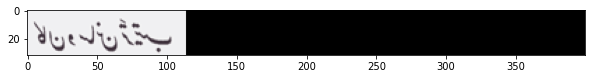

چھ پانژال نٕ کٲشر


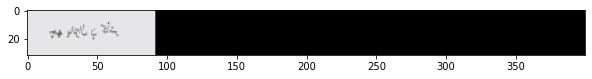

کوچ میٲنِس


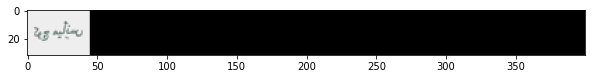

ترنگنی


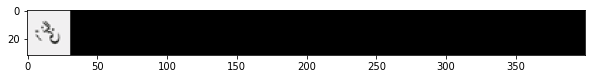

کٔن أندِس


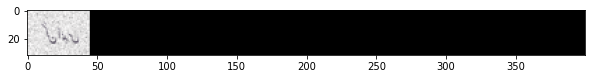

آزادن


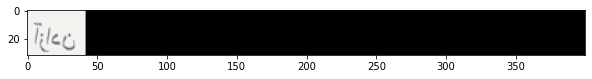

گوو مَژٕ چھ پرین صٲب


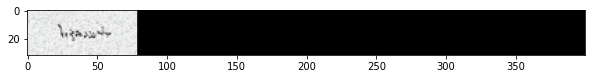

In [6]:
# im, text, text_len = next(iter(train_dl))
import matplotlib.pyplot as plt
viz_ims = im.permute(0,2,3,1).numpy()
viz_text = text.squeeze().numpy()
st = 0
for i in range(12):
    viz_im = viz_ims[i]
    viz_im = viz_im - viz_im.min()
    viz_im = viz_im / viz_im.max()
    st += text_len[i-1] if i > 0 else 0
    print(train_ds.datagen.decode_text(viz_text[st:st+text_len[i]]))
    plt.figure(figsize=(10,10))
    plt.imshow(viz_im)

    plt.show()

In [7]:
from src.models import FinalModel
model = FinalModel(len(data_config["letters"])+1)


In [8]:
from pytorch_lightning.callbacks import LearningRateMonitor

lr_monitor = LearningRateMonitor(logging_interval='step')


In [9]:
import pytorch_lightning as pl 

trainer = pl.Trainer(max_steps=100000, callbacks=[lr_monitor], log_every_n_steps=1)
trainer.fit(model, train_dl)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/murtaza/anaconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:122: UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn("You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.")

  | Name        | Type          | Params
----------------------------------------------
0 | img_encoder | CRNN          | 5.7 M 
1 | ctc         | CustomCTCLoss | 0     
----------------------------------------------
5.7 M     Trainable params
0         Non-trainable params
5.7 M     Total params
22.793    Total estimated model params size (MB)


Epoch 20:  58%|█████▊    | 1598/2776 [19:03<14:03,  1.40it/s, loss=1.35, v_num=262]

/home/murtaza/anaconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
